# Forecasting Australia's 2019 Election with PyMC3
#### Martin Burgess
nousgroup.com

buckleysandnone.com

### Slides: buckleysandnone.com/pycon

Hi, my name's Martin, I'm excited to be here. This is my first time at PyCon and my first time speaking.

I'm a data scientist who's passionate about using information for good. 

I just started a new job as a consultant with Nous Groups, where we work with clients to use their data and have a positive influence. 

Late last year and earlier this year I built a forecast of the 2019 Australian federal election as a personal project to develop my understanding of Bayesian statistics. This forecast was based on publicly available polling data, historical election results and used the probabilistic programming language PyMC3 and today I'm going to take you behind the scenes and show you how it works. 

## Motivation
After my talk, I hope you will:
1. understand some the benefits of _probabilistic_ forecasting
2. see how easy it is to build probabilistic models using PyMC3

Before I jump in I wanted to give you a clear idea of what I hope you'll get out of my talk. First, I hope to show you some of the benefits of probabilistic forecasting. In my view probabilistic forecasting is a great way to approach a lot of different problems. It helps you understand the uncertainty in what you are modelling and make decisions based on your forecast

The second thing I hope you'll see is how easy it is to build models in PyMC3 so that you'll be able to get started yourself. 

I do also want to say, while I have an interest in politics and we're using an election as our guide, hopefully this is presented so that you can take what I'm talking about an apply to your own interesting problems. 

## Overview
1. Probabilistic forecasting
2. Defining the problem (Australian election primer)
3. Building a model in PyMC3

## Overview
1. Probabilistic forecasting <font color=grey>
2. Defining the problem (Australian election primer)
3. Building a model in PyMC3</font>

### What is probabilistic forecasting?

Rather than trying to identify the single most likely outcome, probabilistic forecasting tries to estimate the _relative probabilities of all possible outcomes_.

Bayes' theorem describes the conditional probability of an event based on data as well as prior information or beliefs about the event or conditions related to the event.

<table style="float:right; width: 50%">
<tr>
    <td> <img style="float: left; width: 90%" src="../img/weather-1.png"> </td>
    </tr>
</table> 
<br>
Most weather forecasts are probabilistic. 

Instead of just identifying the most likely outcome they forecast the relative probabilities of the two possible outomes (30% rain vs. 70% no rain). 

A great example of a probabilistic forecast that we see regularly are the "chance of rain" element of a weather forecast. This element is probabilistic in that it is not just stating the most likely outcome: here it would be "No rain" but it is giving you the relative probabilities of the two different outcomes "30% chance of rain, and (an implied) 70% chance of no rain". 

Out of interest, how many people here would take a raincoat or an umbrella if they were going for a walk where the forecast had a 30% chance of rain? Please raise your hand if you would. 


### Why forecast probabilistically? 
#### 1. The future is uncertain. 
<b>Sometimes something other than the _most likely_ outcome happens. </b>

<br>
Probabilistic forecasting can give you a really clear idea of uncertainty associated with your prediction. 

Why would we want to forecast probabilistically? 

In my view, a really key reason for forecasting probabilistically is that the future is uncertain. We don't know what will happen. As scientists and data scientists we can use data to understand what has happened in the past, create a model, and try and predict the future but we can't to do that perfectly. We don't have access to every piece of information we need and even if we did we might not be able to identify all the relationships perfectly. 

When we're thinking about the future, if our focus is just to identify the most likely outcome, we will often end up picking something that doesn't happen. Outcomes other than the most likely outcome happen all the time. Outcomes other than the most likely outcome happen all the time. 

Sometimes it rains when there is a 70% chance that it won't rain. 

Sometimes Donald Trump wins an election. (30%)

Simetimes you guess the correct answer in a multiple choice test. (25)


### 1. The future is uncertain

If we just forecast the most likley outcome, we don't have a clear sense of how much more likely it is than other outcomes. 
<table style="height:50%">
<tr>
    <td style="width: 25%"> <img style="float:right; width:100%" src="../img/newspoll-small.png"> </td> 
    <td style="width:10%; font-size:30px; text-align:center"> vs. </td>
    <td style="width: 65%"> <img style="float:left; width:100%" src="../img/buckleys.png"> </td>
    </tr>
</table>

Left: Newspoll, Coalition 65 seats, ALP 80 seats, with a margin between the two of 15 seats. 
Right: Bucklley's & None.

X-axis all the different possible seat margin outcomes
Y-axis the relative probabilities of those different

Noted the Newspoll outcome of the ALP +15 compare to the Coalition. 

The peak of our distribution is also closer to the actual outome. 

You can see that the actual outcome is still POSSIBLE

### 2. Make better decisions

Understanding uncertainty and forecasting probabilistically can help you make better decisions. 

<table style="width:50%">
<tr>
    <td style="width: 50%"> <img style="width:100%" src="../img/bet.png"> <img style="width:100%" src="../img/money.gif"> </td>    </tr>
</table>

In [44]:
+230000*0.7 + -1000000*0.3

-139000.0

You can use the probabilities generated by your forecast to make decisions


We forecasted probabilities that changed throughout the election campaign. 

Highest we gave the ALP a 70% chance of winning.

70% chance of winning an extra 230,000 dollars

30% chance of losing 1 million dollars. 

Don't bet

## Why forecast probabilistically?

1. The future is uncertain
2. Helps you make decisions
3. Assumptions are clear

There are three really quick reasons to forecast probabilistically
1. The future is uncertain. Probabilistic forecasting helps to estimate uncertainty.
2. Assigning probabilities to different outcomes helps you make decisions. 
3. Any assumptions you have are explicit. 

## Overview
1. <font color=grey>Probabilistic forecasting </font>
2. Defining the problem (Australian election primer)
3. <font color=grey>Building a model in PyMC3</font>

### Who will win the 2019 Australian Federal election?

<br>
Winner decided by the 151 seats in the House of Representatives. 

<table style="float:right; width:25%">
<tr>
    <td style="width: 100%"> <img style="width:100%" src="../img/seats.svg"></td>
    </tr>
</table>

Three primary outcomes:
1. <p style="color:#e53440">ALP win majority (>=76 seats)</p>
2. <p>Minority government (neither party wins 76 seats)</p>
3. <p style="color:#1c4f9c">Coalition win majority (>= 76 seats) </p>

<img src="../img/model-overview-seats2winner.svg">

Forecast trying to predict who will win the 2019 Australian election

76 is the magic number

Working backwards if we want to know the winner we need to know the number of seats each party is going to win. 

<table style="float:right; width:40%">
<tr>
    <td> <img style="width:100%" src="../img/ballot3.png"></td>
    </tr>
</table>

### We'll use the two-party preferred vote

Australia has preferential voting.

<b>TPP Margin = Coalition TPP - ALP TPP</b>

<table style="float:left;width:50%">
    <tr>
        <th>Coalition TPP</th><th>ALP TPP</th><th>TPP Margin</th>
    </tr>
        <tr>
        <td>0.55</td><td>0.45</td><td>0.10</td>
    </tr>
        <tr>
        <td>0.475</td><td>0.525</td><td>-0.05</td>
    </tr>

In Australia we have the unusual system of preferential voting.

Number candidates from most to least preferred.

Most seats are determined by the two-party preferred vote - a measure of the vote between the two major parties. 

Two-party preferred margin - arbitrarily defined as coalition positive and labor negative

We'll see strong correlation between two-party preferred vote and the number of seats a party wins

<img src="../img/model-overview-full.svg">

In [37]:
import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statistics import mean
import theano.tensor as tt
import arviz as az
sns.set(font_scale=1.7)
sns.set_style("white")
sns.despine()
# %matplotlib inline
final_ref_vals = {'alp_seats': 68,
            'lnc_seats': 76,
            'crossbench_total': 6,
#             'majors_seat_margin':9,
            'tpp_margin': 0.03}

final_axes = {'alp_seats': (0,0),
        'lnc_seats': (0,1),
        'crossbench_total': (1,0),
#         'majors_seat_margin':(1,1),
        'tpp_margin': (1,1)}

<Figure size 432x288 with 0 Axes>

In [2]:
%%html
<style>
td {font-size: 28px}
th {font-size: 30px}
</style>

In [3]:
polls = pd.read_csv('../data/polls2019.csv').drop(['next_election', 'days_to_next'], axis=1)
polls['tpp_adjusted'] = polls['tpp_margin'] -  polls['bias']
past_elections = pd.read_csv('../data/election_data.csv', index_col='date')
past_elections = past_elections.tail(22)
crossbench_stats = pd.read_csv('../data/crossbench_stats.csv', index_col=0)

In [4]:
with pm.Model() as full_model:
    p_retain = pm.Beta('p_retain', alpha=1, beta=1)
    crossbench_retain_like = pm.Binomial('crossbench_retain_like', n=crossbench_stats['crossbench_running'], p=p_retain, observed=crossbench_stats['crossbench_retain'])
    crossbench_retain = pm.Binomial('crossbench_retain', n=6, p=p_retain)

    p_gain = pm.Beta('p_gain', alpha=1, beta=1)
    crossbench_gain_like = pm.Binomial('crossbench_gain_like', n=crossbench_stats['gain_opportunities'], p=p_gain, observed=crossbench_stats['crossbench_gain'])
    crossbench_gain = pm.Binomial('crossbench_gain', n=145, p=p_gain)

    crossbench_total = pm.Deterministic('crossbench_total', crossbench_gain + crossbench_retain)

Working backwards again

Estimate the number of seats we're going to use the two-party preferred vote

Polls give us an estimate of the two-party preferred vote before election day

In [ ]:
with full_model:
    # aggregate polls
    tpp_margin = pm.Uniform('tpp_margin', lower=-1, upper=1) # prior
    tpp_likelihood = pm.Normal('tpp_likelihood', 
                               tpp_margin, 
                               sd = polls['std'], 
                               observed = polls['tpp_adjusted'])

    #estimate relationship between tpp_margin and seat_margin
    slope = pm.Normal('slope', 0, sd=10) #prior
    intercept = pm.Normal('intercept', 0, sd=10) #prior
    error = pm.HalfCauchy('error', 1) #prior
    y = intercept + slope * past_elections['tpp_margin'] #define relationship
    tpp2seat_like = pm.Normal('linreg_likelihood', 
                              y, 
                              sd = error, 
                              observed = past_elections['seat_margin_pc_majors']) #likelihood
    
    # combine tpp_margin estimate with our linear relationship
    seat_margin_pc = pm.Normal('seat_margin_pc', 
                               intercept + slope * tpp_margin, 
                               sd = error) #combine estimates
    
    majors_seats = (151.0 - crossbench_total)
    seat_margin_temp = majors_seats * seat_margin_pc
    lnc_seats = pm.Deterministic('lnc_seats', tt.round((majors_seats/2.0) + (seat_margin_temp/2.0)).astype('int8'))
    alp_seats = pm.Deterministic('alp_seats', tt.round((majors_seats/2.0) - (seat_margin_temp/2.0)).astype('int8'))

    majors_seat_margin = pm.Deterministic('majors_seat_margin', lnc_seats - alp_seats)
    trace = pm.sample(draws=5000,tune=1000, cores=4)

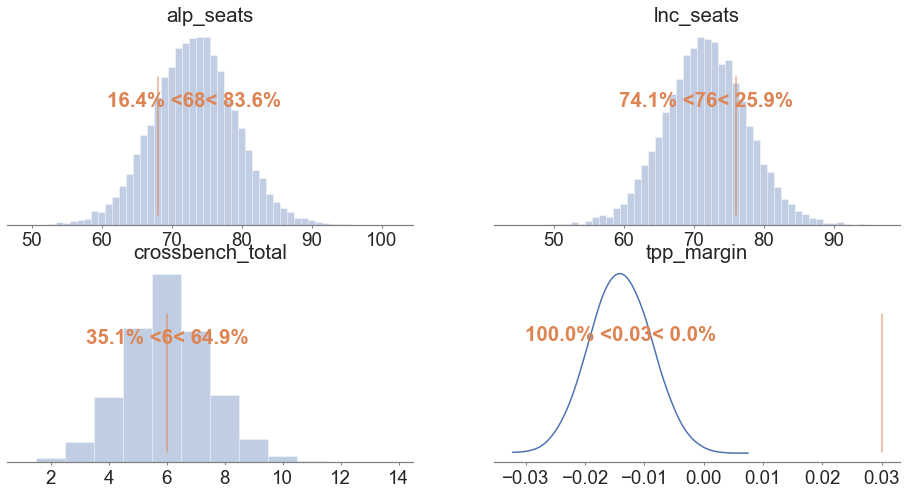

In [41]:
fig, ax = plt.subplots(2,2, figsize=[16,8])
for var in final_ref_vals:
    _ = az.plot_posterior(trace, var_names=var, point_estimate=None, credible_interval=None, ax=ax[final_axes[var]], round_to=2, ref_val=final_ref_vals[var])

Uncertainty:
- Polls
    - sampling error from small samples
    - other survey error
    - people changing their minds
- Translating polls to seats: "uniform swings" are not a thing

## Overview
1. <font color=grey>Probabilistic forecasting
2. Defining the problem (Australian election primer)</font>
3. Building a model in PyMC3

## Building a model in PyMC3

<img style="width:60%" src="../img/PyMC3_banner.svg">

In [5]:
import pymc3 as pm

Introduce PyMC 

> PyMC3 is a probabilistic programming package for Python that allows users to fit Bayesian models using a variety of numerical methods... 
> PyMC3 strives to make Bayesian modeling as simple and painless as possible, allowing users to focus on their scientific problem, rather than on the methods used to solve it.

PyMC3 uses a sampling method called Markov Chain Monte Carlo. 

Briefly, this refers to a class of methods for sampling from a probability distribution in order to construct the most likely distribution. When it's difficult to explicitly calculate the probability distribution we are interested in we can generate samples to estimate that distribution. 

If that doesn't make sense, don't worry. The great thing about PyMC3 is that it leaves the maths to the mathematicians and the modelling building to the scientists.

### Bayesian Method
<img style="width:80%" src="../img/bayes.svg">

For PyMC3 to work we have to specify 3 things. 

> In Bayesian statistics, a prior probability distribution of an uncertain quantity is the probability distribution that would express one's beliefs about this quantity before some evidence (or data) is taken into account.

These are our assumptions.

> In statistics, the likelihood function (often simply called likelihood) expresses how likely particular values of statistical parameters are for a given set of observations.

### Step One: Aggregate polls (bayesian parameter estimation)

<img src="../img/model-overview-2.svg">

#### Polls predicted a Labor victory

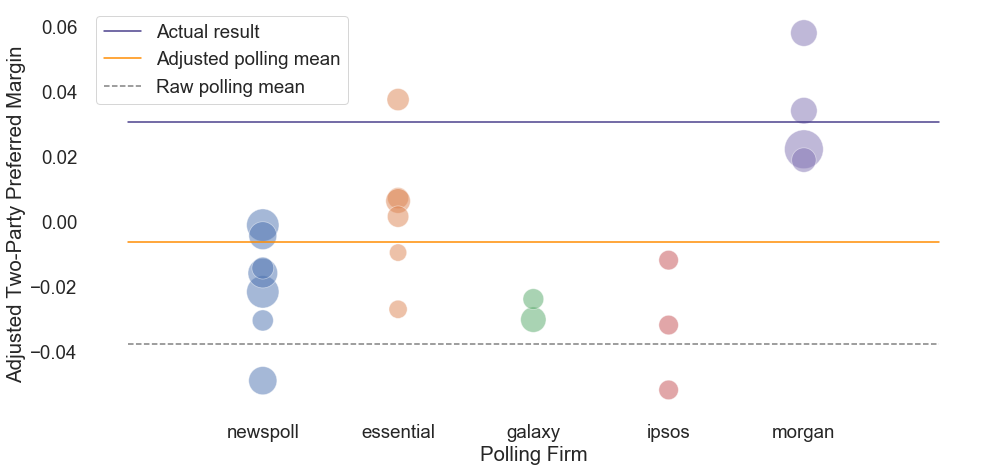

In [80]:
adjusted_mean = polls['tpp_adjusted'].mean()
raw_mean = polls['tpp_margin'].mean()
actual_result = (51.53-48.47)/100
fig, ax = plt.subplots(1,1,figsize=[16, 7.5])
_ = plt.plot([-1,5],[actual_result,actual_result],  color='darkslateblue', label='Actual result')
_ = plt.plot([-1,5],[adjusted_mean,adjusted_mean], color='darkorange', label='Adjusted polling mean')
_ = plt.plot([-1,5],[raw_mean,raw_mean], '--', color='grey', label='Raw polling mean')
_ = sns.scatterplot(x='firm', y='tpp_adjusted', size='std', hue='firm', sizes=(300,1500), alpha=0.5, legend=False, data=polls, ax=ax)
ax.set(xlabel = "Polling Firm", ylabel="Adjusted Two-Party Preferred Margin ")
sns.despine(left=True, bottom=True)
_ = ax.legend(loc = 'best')


X axis: 5 different polling firms included in the forecast

Dots: Each point is a particular poll released by that firm, bigger has less weight, smaller has more weight

Y axis: _Adjusted_ two-party preferred margin based on the historical accuracy of the polling firms

<b>We are trying to combine these polls into a single _probabilistic_ estimate of the two-party preferred vote.</b>

When we're forecasting probabilistically, we're saying that there is an unobserved "real" two-party preferred margin that each pollis an imperfect estimate of. We want to combine all these imperfect estimates into one probabilistic estimate. 

#### What is the universe of possible two-party preferred margins?
<img style="width:80%" src="../img/prior.svg">

In [7]:
with pm.Model() as tpp_model:
    tpp_margin = pm.Uniform('tpp_margin', lower=-1, upper=1)
    tpp_prior = pm.sample(draws=1000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tpp_margin]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2287.15draws/s]


PyMC3 uses the "with" context to hold its models together

Uniform distribution: -1 to 1

Let PyMC3 do it's MCMC magic

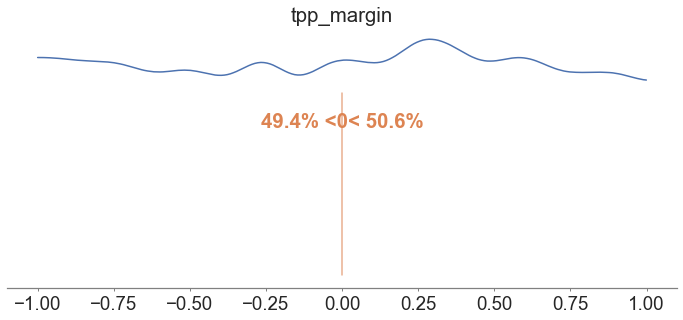

In [21]:
fig, ax = plt.subplots(1,1, figsize=[16, 7.5])
_ = az.plot_posterior(tpp_prior, combined=True, credible_interval=None, point_estimate=None, ax=ax, ref_val=0)

- This is a probability density function.
- Along the x-axis are all the possible values of the two-party preferred margin. 
- The y-axis represents the relative probability of the different values
- You can see here that all values from -1 to 1 have similar probabilities because we haven't included any data in the model yet.

#### Specify a likelihood and add some data
<img style="width:80%" src="../img/bayes.svg">

In [22]:
with pm.Model() as tpp_model:
    tpp_margin = pm.Uniform('tpp_margin', lower=-1, upper=1) # prior
    tpp_likelihood = pm.Normal('tpp_likelihood', 
                               tpp_margin, 
                               sd = polls['std'], 
                               observed = polls['tpp_adjusted'])
    trace = pm.sample(draws=1000, tune=1000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tpp_margin]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 2817.26draws/s]


> Likelihood: expresses how likely particular values of statistical parameters are for a given set of observations

Coalition win TPP vote: 0.40%
Labor win TPP vote: 99.60%


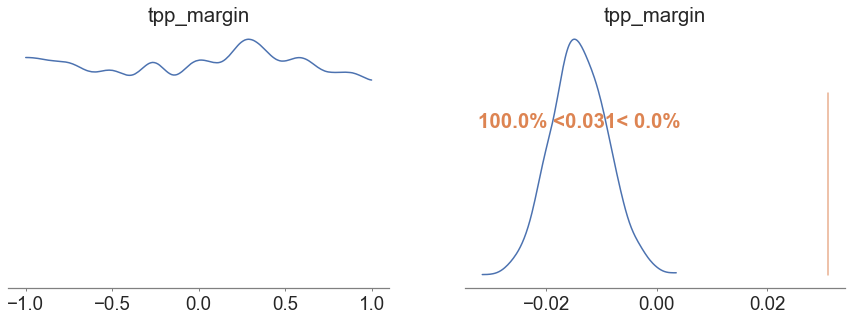

In [25]:
fig, ax = plt.subplots(1,2, figsize=[16, 7.5])
_ = az.plot_posterior(tpp_prior, combined=True, credible_interval=None, point_estimate=None, ax=ax[0]) 
_ = az.plot_posterior(trace, combined=True, credible_interval=None, point_estimate=None, ax=ax[1], round_to=2, ref_val=0.031)

<b>Can we take this shoddy estimate of the two-party preferred vote and still use it to forecast the election?</b>

Left - original prior:
- Note the x axis goes all the way from -1 to 1. 

On the right is our "posterior" probability distribution, the estimate given after we've shown the model our data.

Right - "posterior" probability distribution with our data included:
- x-axis spans -0.03 to 0.03
- y-axis again shows relative probability
- actual result is outside the range of our probabilities
- shoddy estimate of the two-party preferred
- Can we still use it to predict the outcome? 

### From the two-party preferred vote to the seats a party will win (Bayesian linear regression)

<img src="../img/model-overview-3.svg">

#### Look at the data: Historical election results

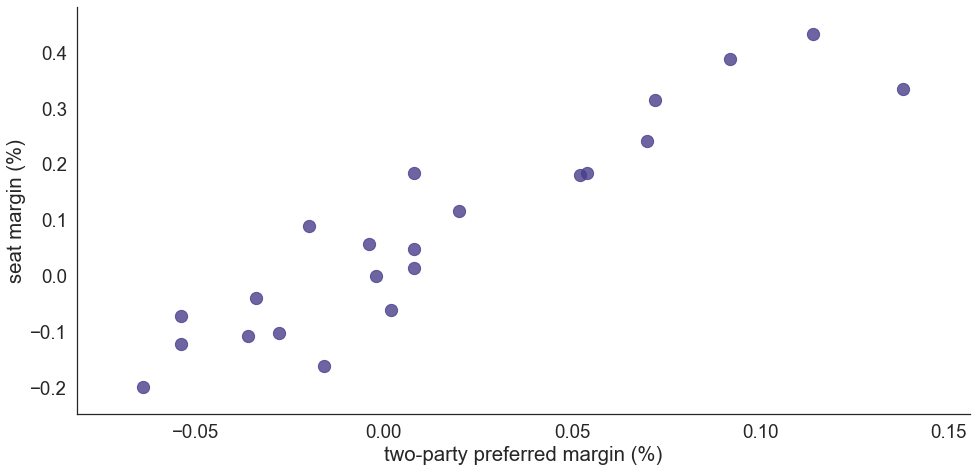

In [56]:
fig, ax = plt.subplots(1,1, figsize=[16,7.5])
_ = plt.scatter(past_elections['tpp_margin'], past_elections['seat_margin_pc_majors'], color="darkslateblue", s=150, alpha=0.8)
_ = plt.xlabel("two-party preferred margin (%)")
_ = plt.ylabel("seat margin (%)")
sns.despine()

X-axis: two-party preferred margin
y-axis: seat margin between two parties

Dots represent different elections

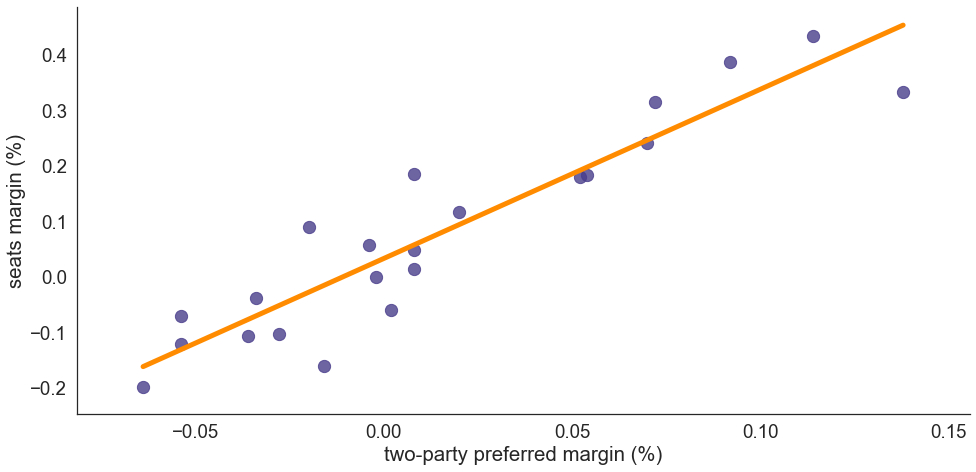

In [58]:
fig, ax = plt.subplots(1,1, figsize=[16,7.5])
_ = plt.scatter(past_elections['tpp_margin'], past_elections['seat_margin_pc_majors'], color="darkslateblue", s=150, alpha=0.8)
_ = plt.plot(np.unique(past_elections['tpp_margin']), np.poly1d(np.polyfit(past_elections['tpp_margin'], past_elections['seat_margin_pc_majors'], 1))(np.unique(past_elections['tpp_margin'])),color="darkorange", linewidth=5)
_ = plt.xlabel("two-party preferred margin (%)")
_ = plt.ylabel("seats margin (%)")
sns.despine()

\begin{align}
\\y & = slope \times x +\ intercept\\
\\y & = 3.05 \times x +\ 0.03\\
\end{align}

X-axis: two-party preferred margin
y-axis: seat margin between two parties

Dots represent different election
Line of best fit through these data points.

We don't want _best_ fit we want probabilistically fit. 

#### Specify priors.
<img style="width:80%" src="../img/prior.svg">

In [16]:
with pm.Model() as linreg_model:
    slope = pm.Normal('slope', 0, sd=10)
    intercept = pm.Normal('intercept', 0, sd=10)
    error = pm.HalfCauchy('error', 1)
    linreg_priors = pm.sample(draws=1000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [error, intercept, slope]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2158.38draws/s]


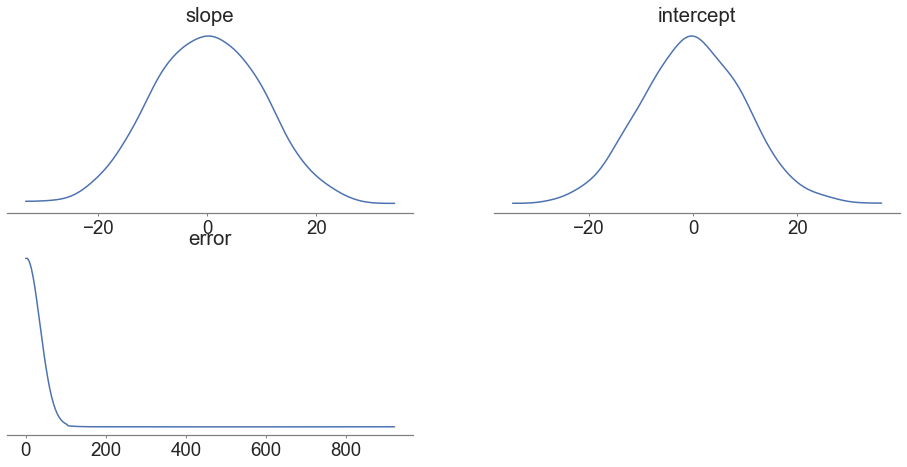

In [17]:
fig, ax = plt.subplots(2,2, figsize=[16,7.5])
_ = az.plot_posterior(linreg_priors, combined=True, credible_interval=None, point_estimate=None, ax=ax)
ax[1,1].set_visible(False)

- Three priors: slope, intercept and error
- x-axes: wide distributions of possible outcomes, not uniform because we don't want to limit them
- y-axes: relative probabilities of those outcomes

#### Specify likelihood.
<img style="width:80%" src="../img/bayes.svg">

In [18]:
with linreg_model:
    y = intercept + slope * past_elections['tpp_margin']
    # tpp2seat likelihood
    tpp2seat_like = pm.Normal('linreg_likelihood', 
                              y, 
                              sd = error, 
                              observed = past_elections['seat_margin_pc_majors'])
    trace = pm.sample(draws=1000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [error, intercept, slope]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:04<00:00, 1310.32draws/s]


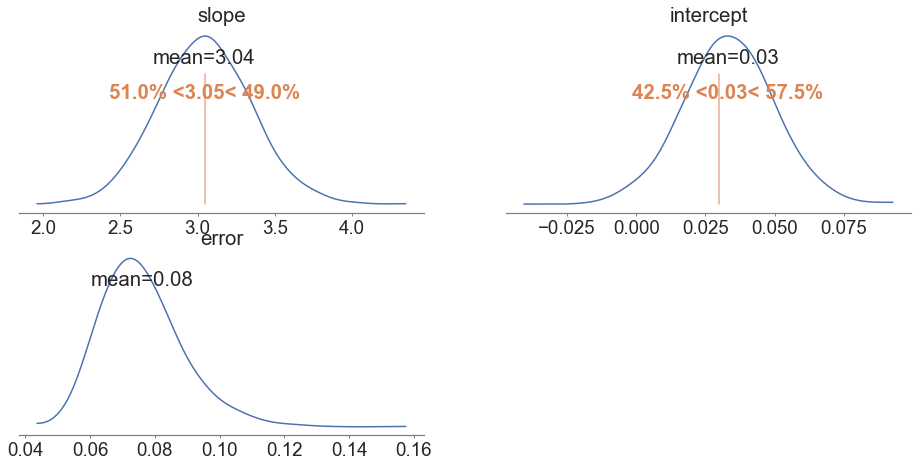

In [20]:
fig, ax = plt.subplots(2,2, figsize=[16,7.5]); ref_vals = {'slope': 3.05,'intercept': 0.03,'error': None}; axes = {'slope': (0,0),'intercept': (0,1),'error': (1,0)}
for var in ref_vals.keys():
    _ = az.plot_posterior(trace, var_names=var, combined=True, credible_interval=None, ax=ax[axes[var]], round_to=2, ref_val=ref_vals[var])
ax[1,1].set_visible(False)

Posterior distributions updated with our data

Range of x-axes is markedly reduced

Line of best fit parameters are marked in orange - we've still got our best guess, we've now just got probability distributions associated with them

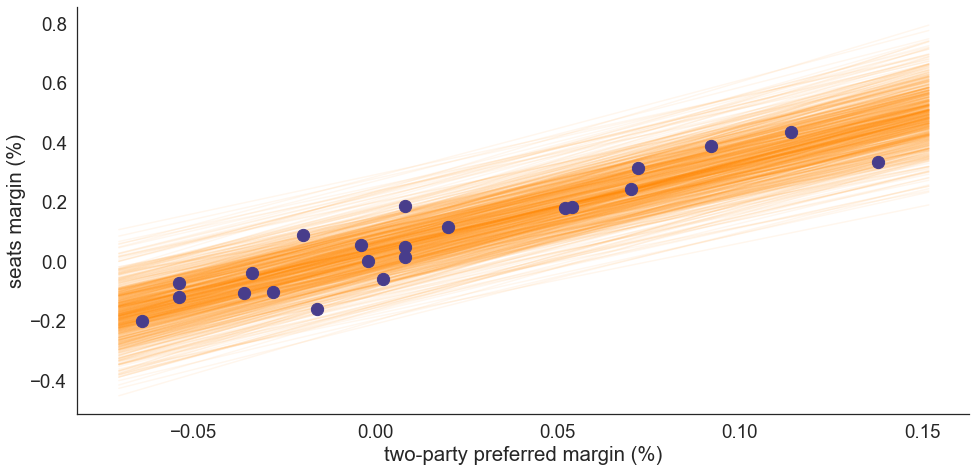

In [59]:
df = pm.trace_to_dataframe(trace)
fig, ax = plt.subplots(1,1, figsize=[16,7.5])
_ = plt.scatter(past_elections['tpp_margin'], past_elections['seat_margin_pc_majors'], color='darkslateblue', zorder=501, s=150)
for i in range(700):
    line_x = pd.DataFrame([past_elections['tpp_margin'].min()*1.1, past_elections['tpp_margin'].max()*1.1])
    line_y = line_x * df.loc[i,'slope'] + df.loc[i,'intercept'] + np.random.normal(loc=0.0, scale=df.loc[i,'error'])
    _ = plt.plot(line_x, line_y, color='darkorange', alpha=0.07, zorder=500-i)
_ = plt.xlabel("two-party preferred margin (%)")
_ = plt.ylabel("seats margin (%)")
sns.despine()

Another way to visualise the posterior

X-axis: two-party preferred margin
y-axis: seat margin between two parties

Dots represent different election
Underneath are 700 lines taken from the sampled posterior distribution. 

Probabilistic estimates cover all previous outcomes

### Crossbench (homework)

In [26]:
with pm.Model() as all_together:
    p_retain = pm.Beta('p_retain', alpha=1, beta=1)
    crossbench_retain_like = pm.Binomial('crossbench_retain_like', n=crossbench_stats['crossbench_running'], p=p_retain, observed=crossbench_stats['crossbench_retain'])
    crossbench_retain = pm.Binomial('crossbench_retain', n=6, p=p_retain)

    p_gain = pm.Beta('p_gain', alpha=1, beta=1)
    crossbench_gain_like = pm.Binomial('crossbench_gain_like', n=crossbench_stats['gain_opportunities'], p=p_gain, observed=crossbench_stats['crossbench_gain'])
    crossbench_gain = pm.Binomial('crossbench_gain', n=145, p=p_gain)

    crossbench_total = pm.Deterministic('crossbench_total', crossbench_gain + crossbench_retain)

Not going to step through this today

Go through the same process: priors, likelihood, data, posterior

### Putting it all together

<img src="../img/model-overview-4.svg">

In [27]:
with all_together:
    # aggregate polls
    tpp_margin = pm.Uniform('tpp_margin', lower=-1, upper=1) # prior
    tpp_likelihood = pm.Normal('tpp_likelihood', 
                               tpp_margin, 
                               sd = polls['std'], 
                               observed = polls['tpp_adjusted'])

    #estimate relationship between tpp_margin and seat_margin
    slope = pm.Normal('slope', 0, sd=10) #prior
    intercept = pm.Normal('intercept', 0, sd=10) #prior
    error = pm.HalfCauchy('error', 1) #prior
    y = intercept + slope * past_elections['tpp_margin'] #define relationship
    tpp2seat_like = pm.Normal('linreg_likelihood', 
                              y, 
                              sd = error, 
                              observed = past_elections['seat_margin_pc_majors']) #likelihood
    
    # combine tpp_margin estimate with our linear relationship
    seat_margin_pc = pm.Normal('seat_margin_pc', 
                               intercept + slope * tpp_margin, 
                               sd = error) #combine estimates
    
    majors_seats = (151.0 - crossbench_total)
    seat_margin_temp = majors_seats * seat_margin_pc
    lnc_seats = pm.Deterministic('lnc_seats', tt.round((majors_seats/2.0) + (seat_margin_temp/2.0)).astype('int8'))
    alp_seats = pm.Deterministic('alp_seats', tt.round((majors_seats/2.0) - (seat_margin_temp/2.0)).astype('int8'))

    majors_seat_margin = pm.Deterministic('majors_seat_margin', lnc_seats - alp_seats)
    trace = pm.sample(draws=5000,tune=1000, cores=4)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [seat_margin_pc, error, intercept, slope, tpp_margin, p_gain, p_retain]
>CompoundStep
>>Metropolis: [crossbench_gain]
>>Metropolis: [crossbench_retain]
Sampling 4 chains: 100%|██████████| 24000/24000 [00:52<00:00, 453.83draws/s]
The number of effective samples is smaller than 25% for some parameters.


Here's all the bits and pieces we've been through already in one place. Most of this code you've already seen. 

First, we specify our prior for the two-party preferred margin, then we update that prior with polling data to generate our estimate. 

Then we specify our priors for the linear relationship between two-party preferred margin and seat margin, then we update those priors using the data. 

Line 20 is a really key line, that's where we take the estimates from those two seperate estimates and combine them together. So we take our estimate of the two-party preferred margin from polling data and our estimates of slope, intercept and sigma and combine them all together. 

The last 6 lines of code are just math to resolve the actual number of seats ear party will win. 

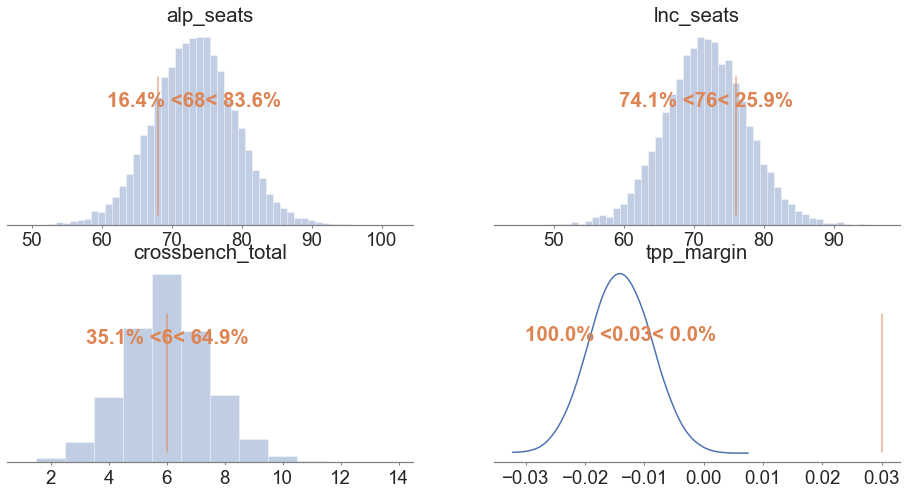

In [42]:
fig, ax = plt.subplots(2,2, figsize=[16,8])
for var in final_ref_vals:
    _ = az.plot_posterior(trace, var_names=var, point_estimate=None, credible_interval=None, ax=ax[final_axes[var]], round_to=2, ref_val=final_ref_vals[var])

## Who will win?
 <img src="../img/model-overview-full.svg">

In [26]:
print("Coalition win majority: {:.2f}%".format((trace['lnc_seats'] >= 76).mean()*100))
print("ALP win majority: {:.2f}%".format((trace['alp_seats'] >= 76).mean()*100))
print("Minority government (neither party wins absolute majority): {:.2f}%".format(((trace['lnc_seats'] <76 ) & (trace['alp_seats'] < 76)).mean()*100))

Coalition win majority: 25.30%
ALP win majority: 34.80%
Minority government (neither party wins absolute majority): 39.90%


Sometimes unlikely things happen. If you flip a coin twice and get heads both times, that's the same chance our forecast had of the Coalition winning the election. If we take an umbrella on a day with a 25% chace of rain, we should be surprised when the Coalition won. 

We can take a pretty crap estimate of the two-party preferred margin but because we estimate uncertainty in other parts of the model, our end result isn't too far off. 

We didn't "predict" the Coalition would win, we assigned 

# Thanks!!

> Sometimes something other than the most likely outcome happens

## Free Resources

[ThinkBayes](https://greenteapress.com/wp/think-bayes/) by [Allen Downey](https://greenteapress.com/wp/think-bayes/)

[Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers) by Cameron Davidson-Pilon

## Me

[buckleysandnone.com](https://www.buckleysandnone.come)

[twitter.com/martintburgess](https://twitter.com/martintburgess)

[nousgroup.com](https://www.nousgroup.com/)
